<a href="https://colab.research.google.com/github/srilasya1815/FMMLlab2024/blob/main/FMML_Module4_Lab3_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

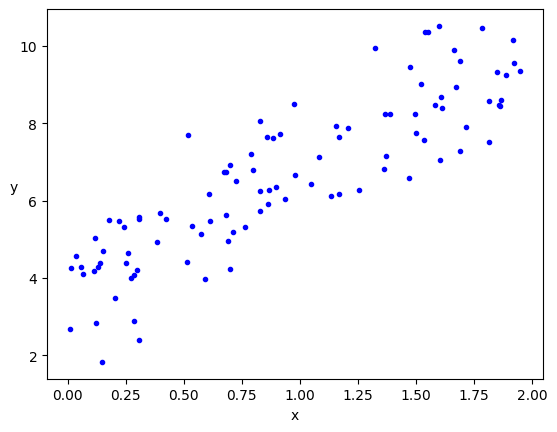

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [7]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.763
y_pred[1]: 3.027
Final error: 5035.202


Plotting the error vs Number of iterations

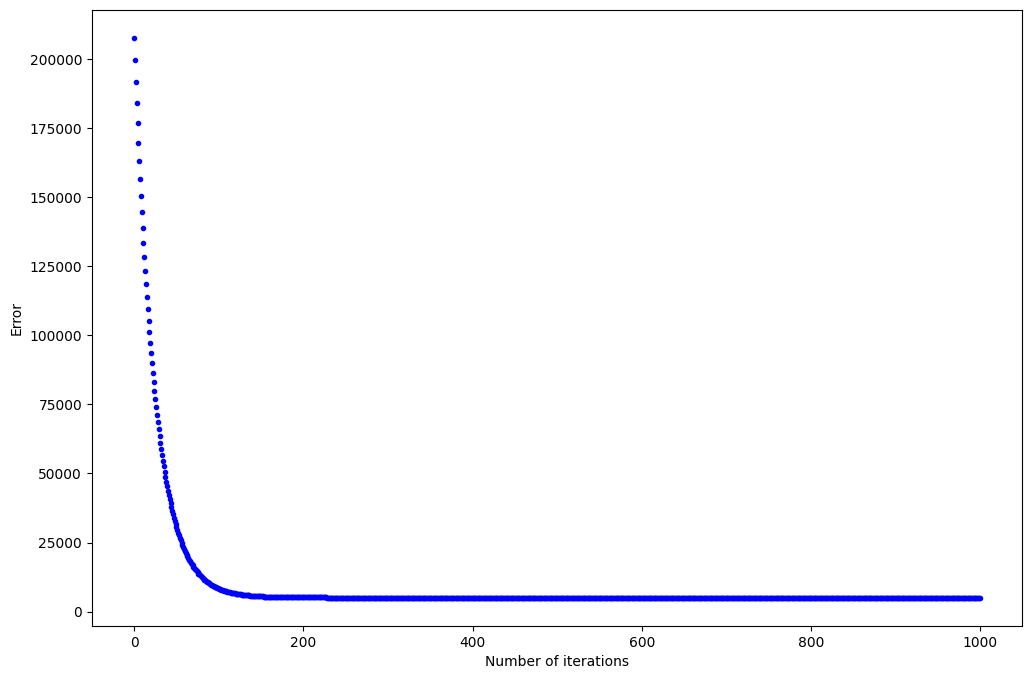

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

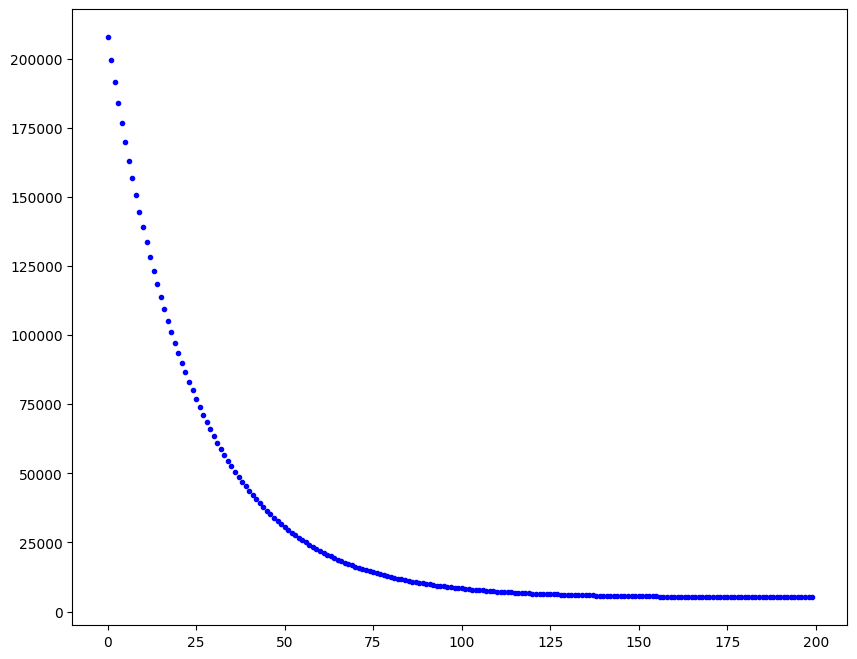

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [10]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [11]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.742
y_pred[1]: 2.944
Final error: 53.960


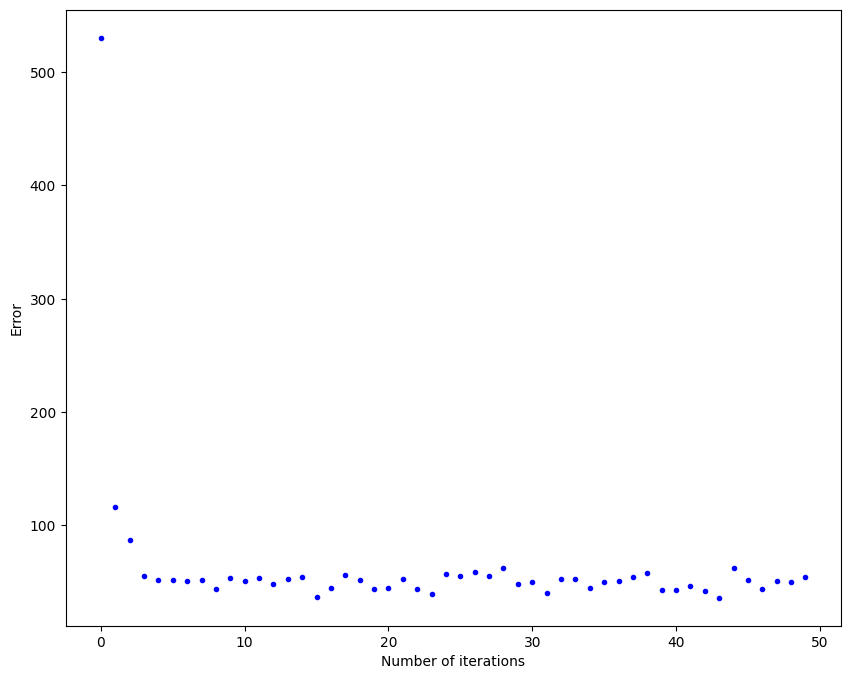

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [13]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [14]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.806
y_pred[1]: 2.987
Final error: 1003.940


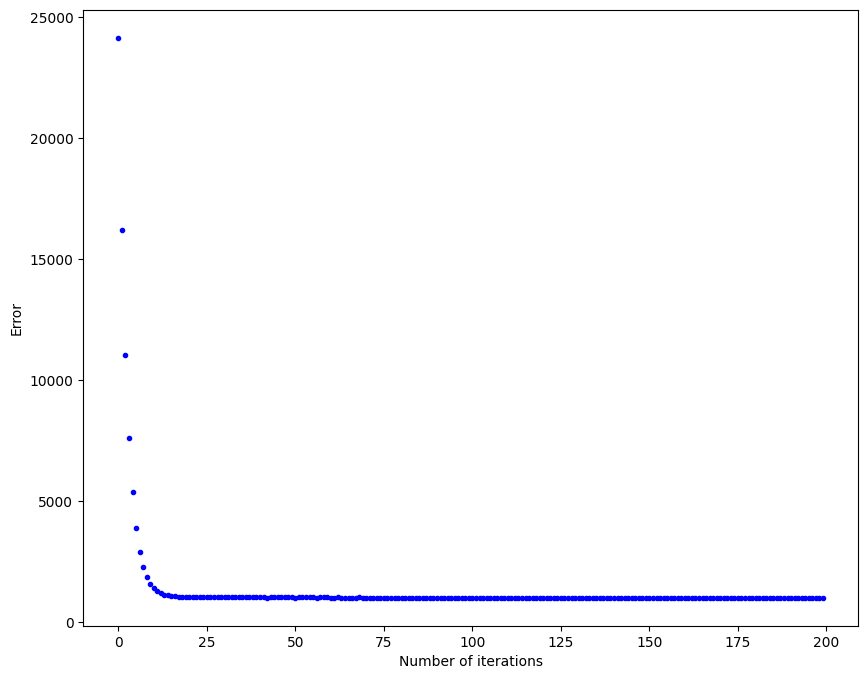

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

1. change batch size in mini-batch gradient descent.

when batch size is 10

In [17]:
lr = 0.1
n_iter = 200
y_pred_1 = np.random.randn(2,1)
y_pred_1, cost_history_1 = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size=10)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_1[0][0], y_pred_1[1][0]))
print('Final error: {:0.3f}'.format(cost_history_1[-1]))

y_pred[0]: 3.813
y_pred[1]: 2.981
Final error: 502.070


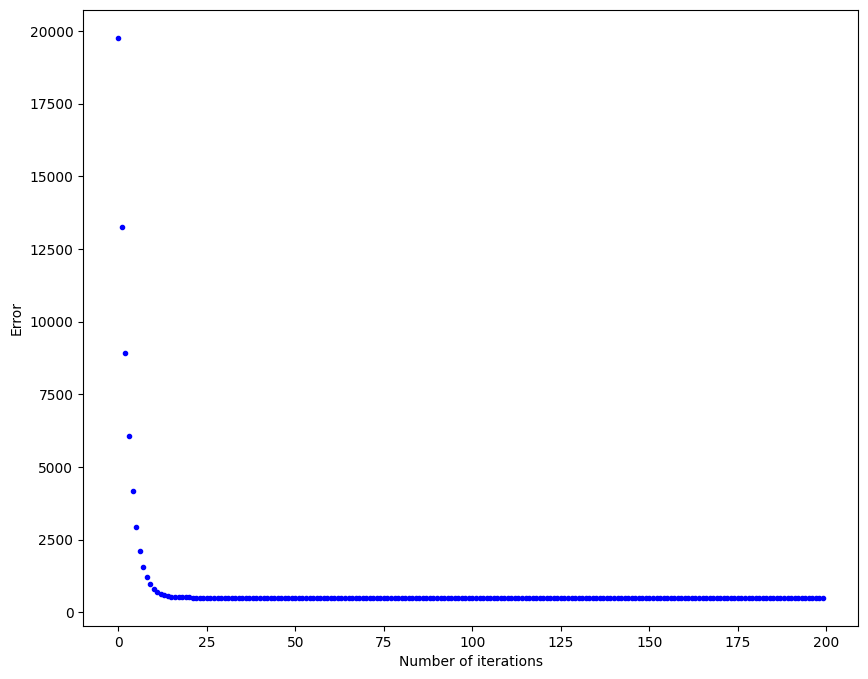

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history_1, 'b.')

when batch size is 40

In [19]:
lr = 0.1
n_iter = 200
y_pred_2 = np.random.randn(2,1)
y_pred_2, cost_history_2 = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size=40)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_2[0][0], y_pred_2[1][0]))
print('Final error: {:0.3f}'.format(cost_history_2[-1]))

y_pred[0]: 3.814
y_pred[1]: 2.982
Final error: 1838.764


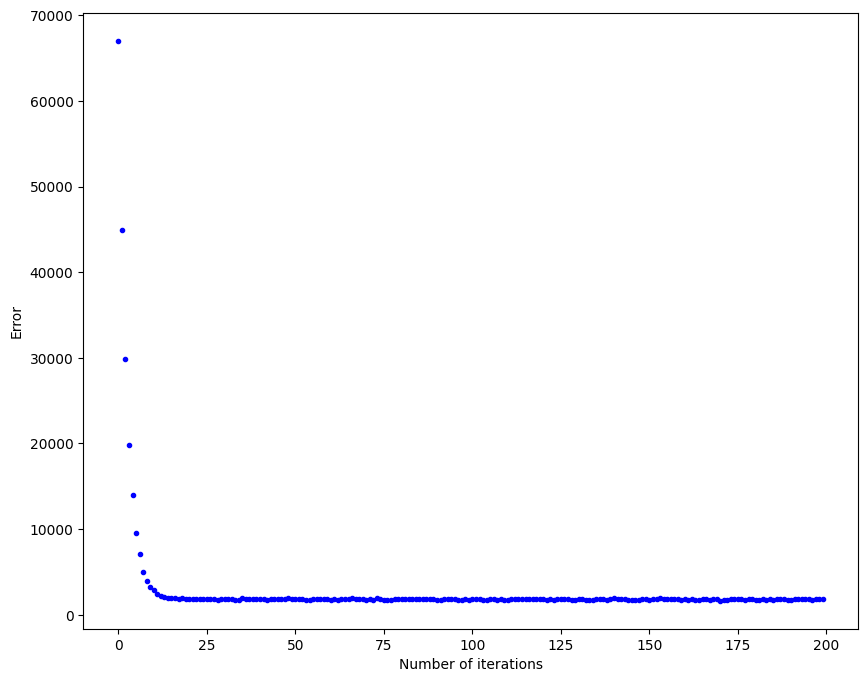

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history_2, 'b.')

when batch size is 50

In [21]:
lr = 0.1
n_iter = 200
y_pred_3 = np.random.randn(2,1)
y_pred_3, cost_history_3 = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size=50)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_3[0][0], y_pred_3[1][0]))
print('Final error: {:0.3f}'.format(cost_history_3[-1]))

y_pred[0]: 3.812
y_pred[1]: 2.980
Final error: 2511.633


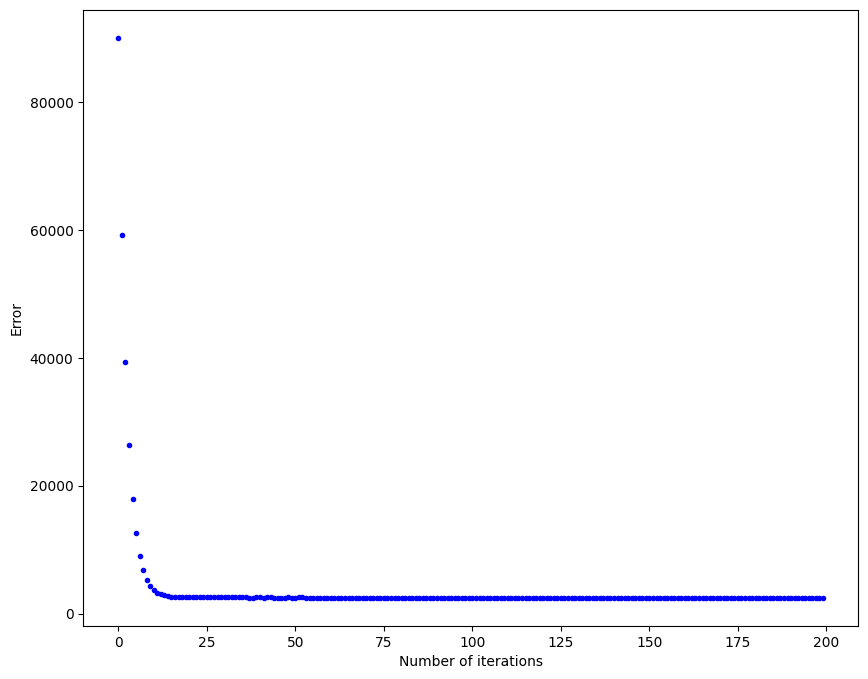

In [27]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history_3, 'b.')

this what we are getting

| Batch Size | Final Error |
|------------|-------------|
| 10         | 401.794     |
| 20         | 803.715     |
| 40         | 1477.948    |
| 50         | 2016.357    |

2. Test all the three out on real datasets.

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss


data = pd.read_csv('sonar_csv.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1].map({'Rock': 0, 'Mine': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Batch Gradient Descent
model_batch = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
model_batch.fit(X_train_scaled, y_train)
predictions_batch = model_batch.predict(X_test_scaled)
accuracy_batch = accuracy_score(y_test, predictions_batch)
loss_batch = log_loss(y_test, model_batch.predict_proba(X_test_scaled))
print(f'Accuracy Batch GD: {accuracy_batch}')
print(f'Final error in Batch Gradient Descent :{loss_batch}')

# Mini-Batch Gradient Descent
model_mini_batch = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42, learning_rate='invscaling', eta0=0.01)
model_mini_batch.fit(X_train_scaled, y_train)
predictions_mini_batch = model_mini_batch.predict(X_test_scaled)
accuracy_mini_batch = accuracy_score(y_test, predictions_mini_batch)
loss_mini_batch = log_loss(y_test, model_mini_batch.predict_proba(X_test_scaled))
print(f'Accuracy Mini-Batch GD: {accuracy_mini_batch}')
print(f'Final error in Mini-Batch Gradient Descent :{loss_mini_batch}')

# Stochastic Gradient Descent (SGD)
model_stochastic = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42, learning_rate='invscaling', eta0=0.01, shuffle=True)
model_stochastic.fit(X_train_scaled, y_train)
predictions_stochastic = model_stochastic.predict(X_test_scaled)
accuracy_stochastic = accuracy_score(y_test, predictions_stochastic)
loss_stochastic = log_loss(y_test, model_stochastic.predict_proba(X_test_scaled))
print(f'Accuracy Stochastic GD: {accuracy_stochastic}')
print(f'Final error in stochastic Gradient Descent :{loss_stochastic}')


FileNotFoundError: [Errno 2] No such file or directory: 'sonar_csv.csv'

3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

## **Additional Critical Thinking Question**



In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

sonar = pd.read_csv('sonar_csv.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1].map({'Rock': 0, 'Mine': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

learning_rates = [0.01, 0.1, 0.5]

for learning_rate in learning_rates:
    # Batch Gradient Descent
    model_batch = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42, learning_rate='constant', eta0=learning_rate)
    model_batch.fit(X_train_scaled, y_train)
    predictions_batch = model_batch.predict(X_test_scaled)
    accuracy_batch = accuracy_score(y_test, predictions_batch)
    print(f'Batch GD with Learning Rate {learning_rate}: Accuracy: {accuracy_batch}')

    # Stochastic Gradient Descent (SGD)
    model_stochastic = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42, learning_rate='constant', eta0=learning_rate, shuffle=True)
    model_stochastic.fit(X_train_scaled, y_train)
    predictions_stochastic = model_stochastic.predict(X_test_scaled)
    accuracy_stochastic = accuracy_score(y_test, predictions_stochastic)
    print(f'Stochastic GD with Learning Rate {learning_rate}: Accuracy: {accuracy_stochastic}')

    # Mini-Batch Gradient Descent
    model_mini_batch = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42, learning_rate='constant', eta0=learning_rate)
    model_mini_batch.fit(X_train_scaled, y_train)
    predictions_mini_batch = model_mini_batch.predict(X_test_scaled)
    accuracy_mini_batch = accuracy_score(y_test, predictions_mini_batch)
    print(f'Mini-Batch GD with Learning Rate {learning_rate}: Accuracy: {accuracy_mini_batch}')
    print()


**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.



 Ans:   The correct answer is:

(v) For convex loss functions (i.e., with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

Explanation:

- Batch Gradient Descent (BGD) is guaranteed to converge to the global optimum for convex loss functions, as it uses the entire training dataset to compute the gradient at each step.
- Stochastic Gradient Descent (SGD) is also guaranteed to converge to the global optimum for convex loss functions, but with some additional assumptions:
    - The learning rate must be carefully chosen to ensure convergence.
    - The noise in the stochastic gradient estimates must be bounded.
    - The number of iterations must be sufficiently large.

In practice, SGD often converges faster than BGD, especially for large datasets, since it uses only a single example to compute the gradient at each step.

The other options are incorrect:

- (i) BGD is not always guaranteed to converge to the global optimum for non-convex loss functions.
- (ii) SGD is not always guaranteed to converge to the global optimum, even for convex loss functions, due to the noise in the stochastic gradient estimates.
- (iii) and (iv) are incorrect, as both BGD and SGD can converge to the global optimum for convex loss functions.
- (vi) is incorrect, as both BGD and SGD can converge to the global optimum for convex loss functions.